In [6]:
import os
import pandas as pd
import glob
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [7]:
base_dir = 'PlantVillage-Dataset/raw/color'

plant_labels = []
for imagePath in os.listdir(base_dir):
	l = label = imagePath.split(os.path.sep)[-1].split("___")
	plant_labels.append(l)

classes_list = []
for item in plant_labels:
    if item[0] not in classes_list:
        classes_list.append(item[0])
    if item[1] not in classes_list:
        classes_list.append(item[1])

classes_list.remove('healthy')

for lists in os.listdir(base_dir):
  path = os.path.join(base_dir, lists)
  for filename in glob.glob(path+'/*'):
    p_l = lists.split(os.path.sep)[-1].split("___")
    img_class=[]
    if p_l[0] in classes_list:
      img_class.append(p_l[0])
    if p_l[1] in classes_list:
      img_class.append(p_l[1])

with open('plantvillage_annotation.csv', 'w', newline='') as file:
  file.write("id;classes;")
  file.write('\n')
  for lists in os.listdir(base_dir):
    path = os.path.join(base_dir, lists)
    for filename in glob.glob(path+'/*'):
      file.write(os.path.basename(filename))
      file.write(';')
      p_l = lists.split(os.path.sep)[-1].split("___")
      img_class=[]
      if p_l[0] in classes_list:
        img_class.append(p_l[0])
      if p_l[1] in classes_list:
        img_class.append(p_l[1])
      file.write(str(img_class))
      file.write(';')
      file.write('\n')

In [8]:
classes_list

['Grape',
 'Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Soybean',
 'Cherry_(including_sour)',
 'Tomato',
 'Septoria_leaf_spot',
 'Corn_(maize)',
 'Pepper,_bell',
 'Bacterial_spot',
 'Apple',
 'Black_rot',
 'Northern_Leaf_Blight',
 'Strawberry',
 'Cercospora_leaf_spot Gray_leaf_spot',
 'Common_rust_',
 'Squash',
 'Powdery_mildew',
 'Early_blight',
 'Potato',
 'Raspberry',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Late_blight',
 'Cedar_apple_rust',
 'Spider_mites Two-spotted_spider_mite',
 'Esca_(Black_Measles)',
 'Peach',
 'Orange',
 'Haunglongbing_(Citrus_greening)',
 'Tomato_mosaic_virus',
 'Target_Spot',
 'Leaf_Mold',
 'Leaf_scorch',
 'Apple_scab',
 'Blueberry']

In [9]:
img_metadata = pd.read_csv('plantvillage_annotation.csv',sep=';')
img_metadata = img_metadata.drop('Unnamed: 2', axis=1)
img_metadata['id'] = img_metadata['id'].apply(lambda x: 'plants/' + x)
img_metadata['classes'] = img_metadata['classes'].apply(lambda x: eval(x))
img_metadata.head()

,id,classes
0,plants/279b02e6-6c6e-43eb-abfa-171cd1bded41___...,"[Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]"
1,plants/8dacdf2a-e031-4b21-b191-86e82078ef6d___...,"[Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]"
2,plants/42032c9c-e401-452a-9b77-e19ee8cd7ed5___...,"[Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]"
3,plants/54a17d93-22ce-4478-bb69-5d9320b34ad0___...,"[Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]"
4,plants/ea7391a1-7052-4db6-bbd4-210fb75bd238___...,"[Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]"


In [10]:
img_metadata.classes

0        [Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]
1        [Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]
2        [Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]
3        [Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]
4        [Grape, Leaf_blight_(Isariopsis_Leaf_Spot)]
                            ...                     
54300      [Cherry_(including_sour), Powdery_mildew]
54301      [Cherry_(including_sour), Powdery_mildew]
54302      [Cherry_(including_sour), Powdery_mildew]
54303      [Cherry_(including_sour), Powdery_mildew]
54304      [Cherry_(including_sour), Powdery_mildew]
Name: classes, Length: 54305, dtype: object

In [11]:
all_classes = img_metadata['classes'].apply(pd.Series).stack().tolist()

# Извлекаем уникальные классы с помощью set
unique_classes = set(all_classes)

# Если нужно получить результат в виде списка
unique_classes_list = np.array(list(unique_classes))

print(unique_classes_list)

['Leaf_blight_(Isariopsis_Leaf_Spot)'
 'Cercospora_leaf_spot Gray_leaf_spot' 'Leaf_scorch'
 'Haunglongbing_(Citrus_greening)' 'Orange' 'Esca_(Black_Measles)'
 'Late_blight' 'Common_rust_' 'Raspberry' 'Tomato_Yellow_Leaf_Curl_Virus'
 'Black_rot' 'Septoria_leaf_spot' 'Squash' 'Tomato' 'Early_blight'
 'Leaf_Mold' 'Grape' 'Target_Spot' 'Pepper,_bell' 'Tomato_mosaic_virus'
 'Soybean' 'Northern_Leaf_Blight' 'Powdery_mildew' 'Apple'
 'Cedar_apple_rust' 'Blueberry' 'Spider_mites Two-spotted_spider_mite'
 'Bacterial_spot' 'Corn_(maize)' 'Cherry_(including_sour)' 'Strawberry'
 'Potato' 'Apple_scab' 'Peach']


In [37]:
unique_classes_list.shape

(34,)

In [5]:
!mkdir -p plants
destination_directory = 'plants/'

for lists in tqdm(os.listdir(base_dir)):
    path = os.path.join(base_dir, lists)
    for filename in glob.glob(path+'/*'):
        shutil.copy2(filename, destination_directory)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.25it/s]


Text(0.5, 1.0, "['Grape', 'Leaf_blight_(Isariopsis_Leaf_Spot)']")

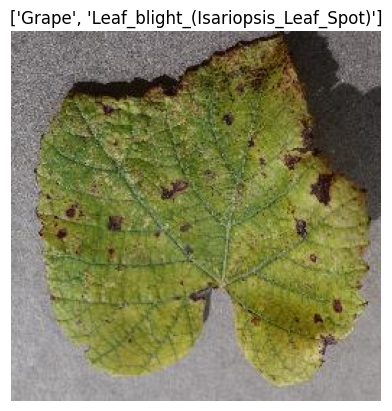

In [12]:
img = plt.imread(img_metadata.id[0])
plt.imshow(img)
plt.axis('off')
plt.title((img_metadata.classes[0]))